In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_location = 'C:/Windows/Fonts/gulim.ttc'
font_name = font_manager.FontProperties(fname = font_location).get_name()
rc('font', family=font_name)
import warnings
warnings.filterwarnings('ignore')
import datetime as dt

In [3]:
plt.style.use('ggplot')

# 데이터 살펴보기, 전처리

소매업태별 매출 실적 데이터를 불러옵니다. 출처는 한국은행경제통계시스템 입니다.

기준은 2015년 매출 실적입니다(2015년 매출실적=100)


고려한 업태는 다음과 같습니다.

'총지수','백화점','대형마트','면세점','슈퍼마켓 및 잡화점','편의점','승용차 및 연료 소매점','전문소매점','무점포 소매'




In [4]:
stores= pd.read_excel('소매업태별_판매액계절조정지수_201701_202009.xlsx')

In [5]:
stores['시점'] = stores['시점'].astype('str').apply(lambda x: x[:4]+'-'+x[5:8])
stores['시점']=pd.to_datetime(stores['시점']) # 시점을 예쁘게 보기 위한 처리입니다.

In [6]:
stores=stores[12:] # 2017년 데이터 제거

In [7]:
stores.head()

,시점,총지수,백화점,대형마트,면세점,슈퍼마켓 및 잡화점,편의점,승용차 및 연료 소매점,전문소매점,무점포 소매
12,2018-01-01,108.8,95.0,98.0,190.3,102.7,140.8,105.2,98.0,137.7
13,2018-02-01,110.3,102.8,98.0,192.1,103.4,140.4,108.3,99.5,142.4
14,2018-03-01,111.4,100.4,99.0,212.8,102.3,144.3,109.5,99.2,141.5
15,2018-04-01,111.2,99.0,98.7,217.7,100.9,142.9,110.0,98.8,144.1
16,2018-05-01,109.9,98.8,96.7,212.1,100.5,141.4,108.7,97.2,143.4


In [8]:
types=list(stores.columns)[1:10] # 업태 종류입니다.

# 트렌드 확인하기

우선 모든 산업들의 동향을 한 그래프로 나타내겠습니다

Text(0.5, 1.0, '업태별 추이')

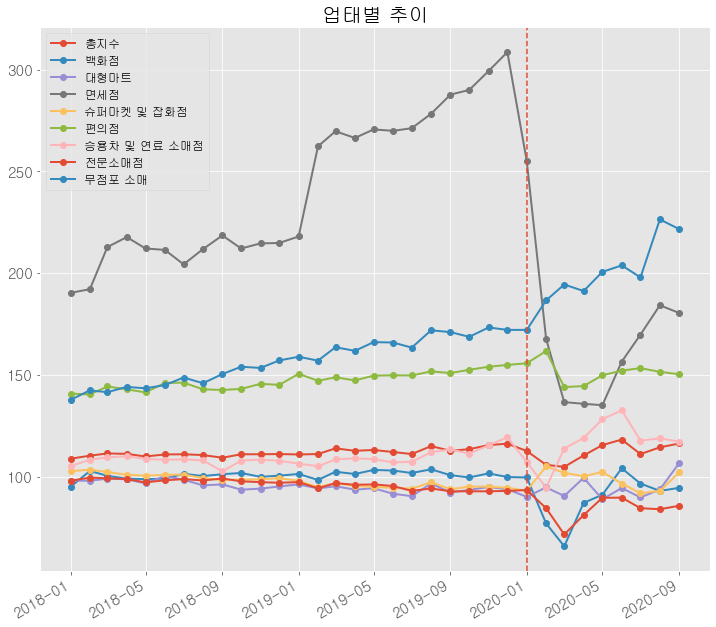

In [9]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
plt.setp(ax.get_xticklabels(), rotation=30, ha='right', fontsize =15)
plt.setp(ax.get_yticklabels(), fontsize =15)

for i in types:
    ax.plot(np.array(stores[['시점']]),np.array(stores[[i]]),marker='o', linewidth=2,label=stores[[i]].columns[0])
ax.axvline(x=stores['시점'][36],linestyle ='--') 
ax.legend(fontsize=12,loc='upper left')
ax.set_title('업태별 추이',fontsize=20)

면세범의 등락폭이 매우 큽니다. 면세점 때문에 다른 업종들이 잘 보이지 않으니 면세점을 제거하고 확인 하도록 하겠습니다.

In [10]:
types.remove('면세점')

Text(0.5, 1.0, '업태별 추이')

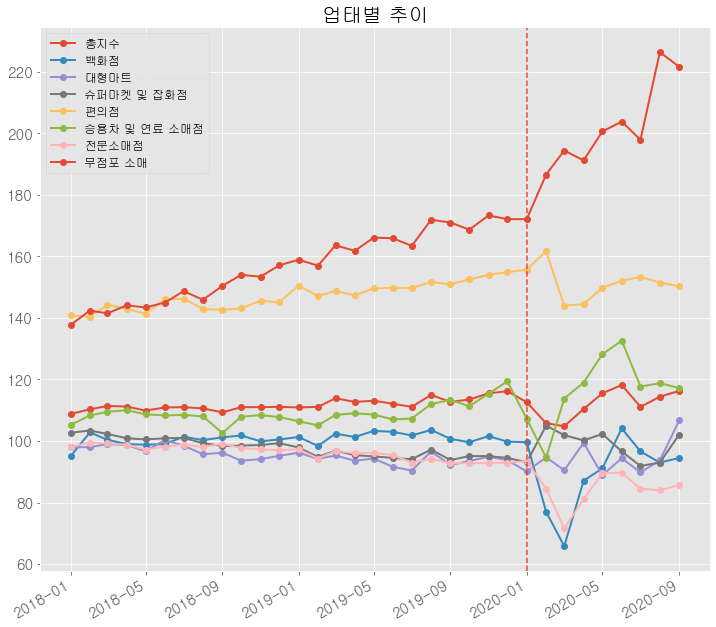

In [11]:
fig, ax = plt.subplots(1,1,figsize=(12,10))
plt.setp(ax.get_xticklabels(), rotation=30, ha='right', fontsize =15)
plt.setp(ax.get_yticklabels(), fontsize =15)

for i in types:
    ax.plot(np.array(stores[['시점']]),np.array(stores[[i]]),marker='o', linewidth=2,label=stores[[i]].columns[0])
ax.axvline(x=stores['시점'][36],linestyle ='--') 
ax.legend(fontsize=12,loc='upper left')
ax.set_title('업태별 추이',fontsize=20)

무점포 소매가 계속 증가하는 것이 인상적입니다.

대부분이 2020년 초에 하락하는 모습을 보입니다


각 업태별로 좀 더 자세히 들여다봅니다.

In [12]:
types=list(stores.columns)[1:10]

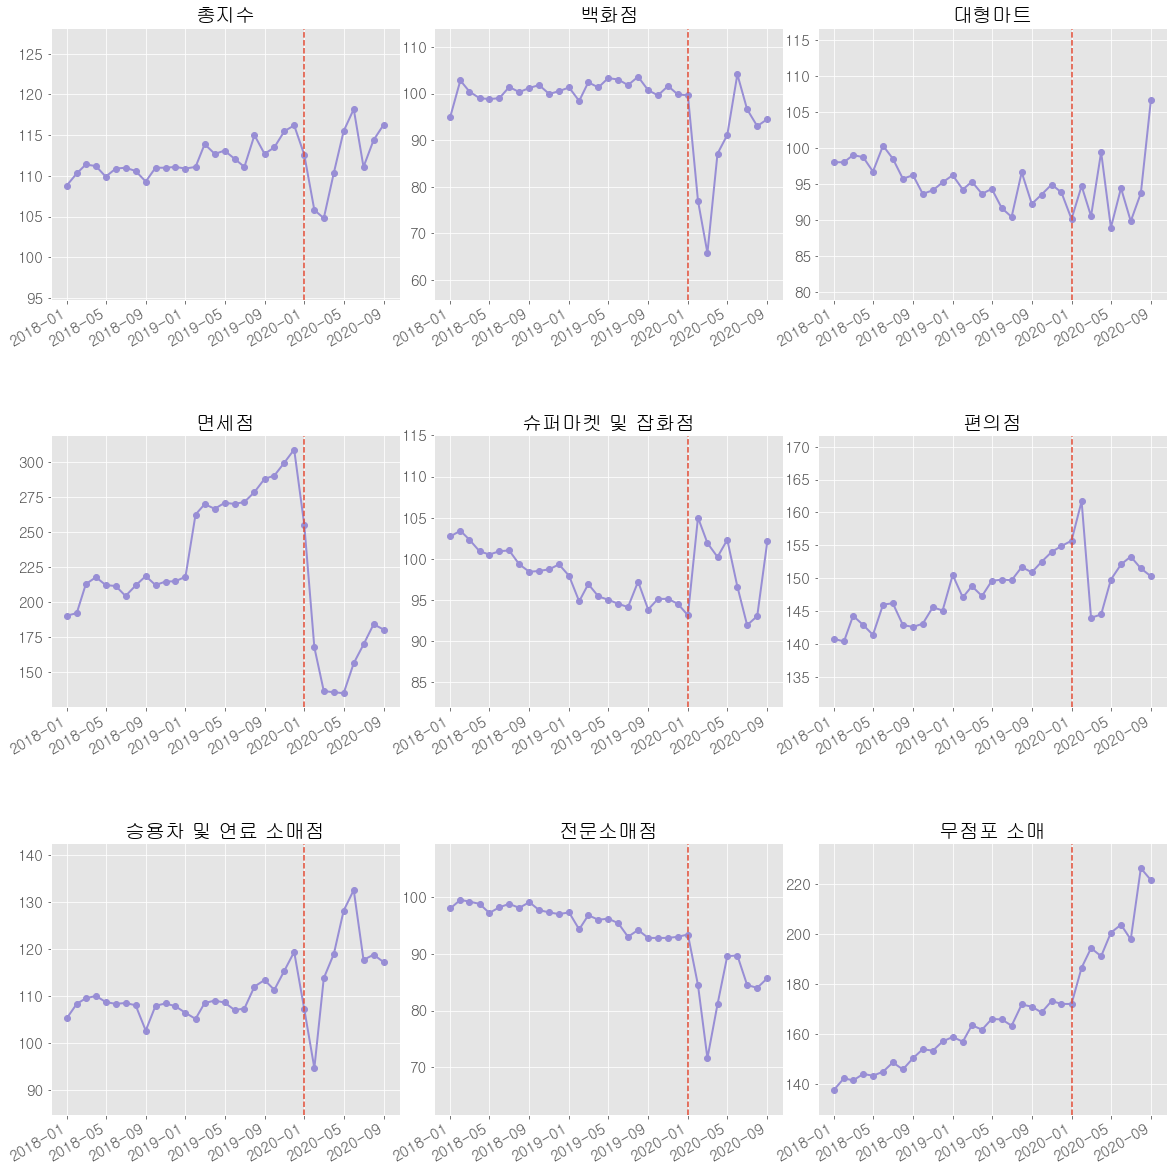

In [13]:

fig, ax = plt.subplots(3,3,figsize=(20,20))


ax = ax.ravel()
for i, j in zip(range(len(ax)), types):
    plt.setp(ax[i].get_xticklabels(), rotation=30, ha='right')
    plt.setp(ax[i].get_xticklabels(), fontsize =15)
    plt.setp(ax[i].get_yticklabels(), fontsize =15)
    ax[i].plot(np.array(stores[['시점']]),np.array(stores[j]),marker='o', linewidth=2,label=j,color='C2')
    ax[i].axvline(x=stores['시점'][36],linestyle ='--',color='C0')
    ax[i].set_ylim(np.min(np.array(stores[j])) - 10, np.max(np.array(stores[j])) + 10)
    

    ax[i].set_title(j,fontsize=20)
    
    

plt.subplots_adjust(wspace=0.1, hspace=0.5)
plt.show()

빨간 선이 2020년 1월입니다.

우선 총 지수 부터 살펴보겠습니다.



In [14]:
def make_graph(type):
    plt.figure(figsize=(8, 7))
    j=type
    plt.xticks(rotation=30, ha='right', fontsize =15)
    plt.yticks(fontsize =15)

    plt.plot(np.array(stores[['시점']]),np.array(stores[j]),marker='o', linewidth=2,label=j,color='C2')
    plt.axvline(x=stores['시점'][36],linestyle ='--',color='C0')
    plt.ylim(np.min(np.array(stores[j])) - 15, np.max(np.array(stores[j])) + 15)
    plt.title(j,fontsize=20)
    return plt.show()

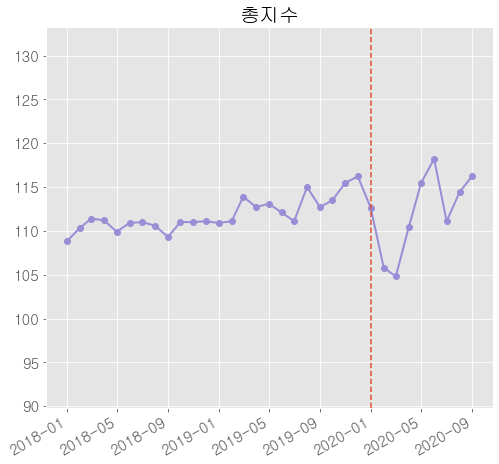

In [15]:
make_graph('총지수')

총 지수를 보면 코로나 초기 타격을 받았다가 다시 회복한 것을 알 수 있습니다.




업태별 상황을 보도록 하겠습니다.

우선 백화점부터 시작합니다.

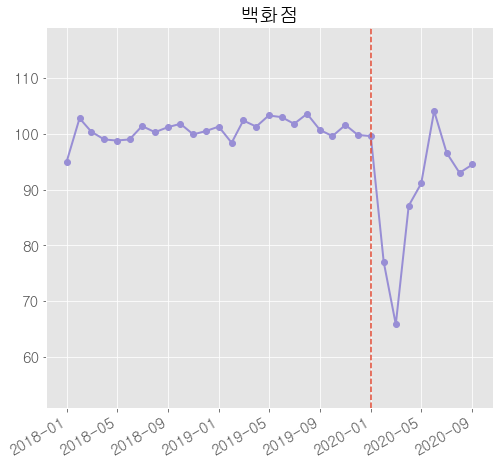

In [16]:
make_graph('백화점')

백화점의 경우 코로나 초기 심각한 타격을 받았습니다.그러나 회복 속도 역시 빨랐습니다.

고가품들의 매출 증가, 판촉행사 등으로 회복한 것으로 판단하였습니다.

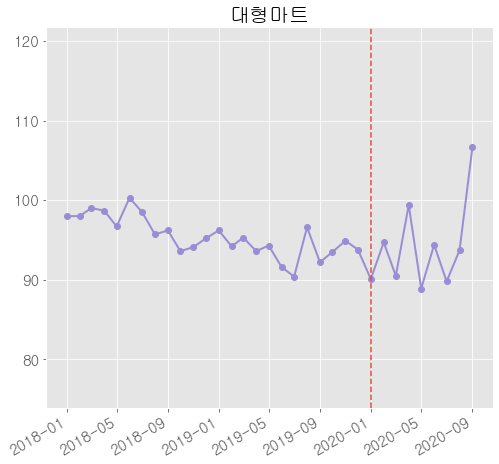

In [17]:
make_graph('대형마트')

대형마트의 경우 코로나 이전부터 서서히 감소하는 추세였습니다. 오히려 코로나 이후 감소량이 적어진 것을 확인할 수 있습니다.

9월에 실적이 많이 증가했습니다. 이는 추석을 '언택트 명절'로 보내면서 고가 선물 판매가 늘어난 게 실적에 반영된 것으로 보입니다.

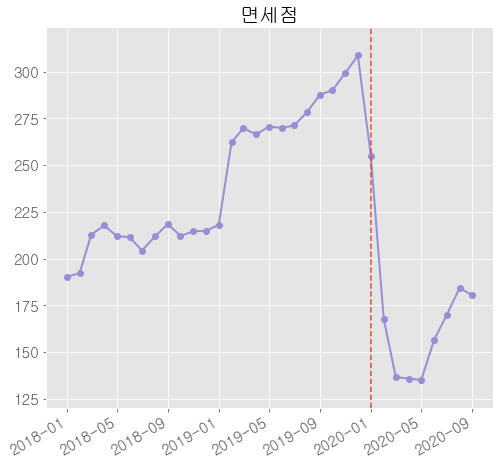

In [18]:
make_graph('면세점')

면세점은 코로나에 가장 심각한 타격을 입었습니다. 코로나 이전까지 급격한 상승폭을 보였으나 코로나 타격 이후 회복을 못하고 있습니다.

해외 관광객들의 감소가 큰 영향을 주었습니다.

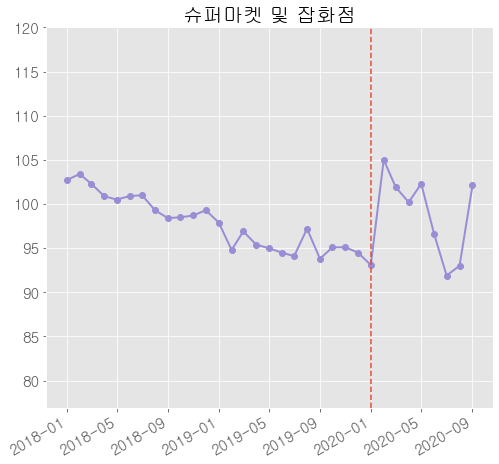

In [19]:
make_graph('슈퍼마켓 및 잡화점')

슈퍼마켓 및 잡화점은 코로나 이후 오히려 호황이었습니다. 대형마트 기피현상으로 인해 반사이익을 보았습니다.

이는 사람들이 집 근처에서 필요한 물품만 빠르게 사려는 심리가 작용했기 때문입니다.

그러나 5월 이후 다른 업태들이 회복함에 따라 매출이 감소하는 것을 확인하였습니다.

최근에는 다시 회복세를 보이고 있습니다.

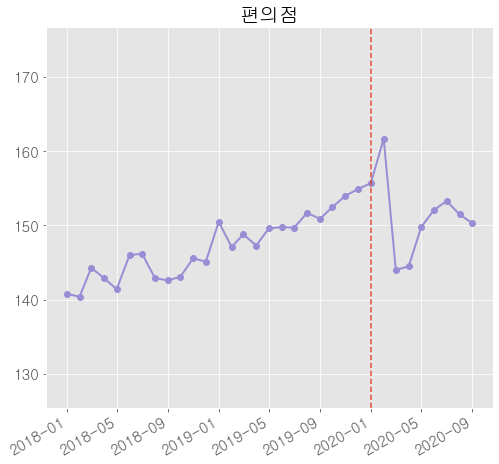

In [20]:
make_graph('편의점')

편의점 같은 경우 코로나에 타격을 받았습니다. 대학가, 유흥가의 점포들이 큰 피해를 받았기 때문입니다.

하지만 5월 이후 회복 중인 것으로 보입니다.

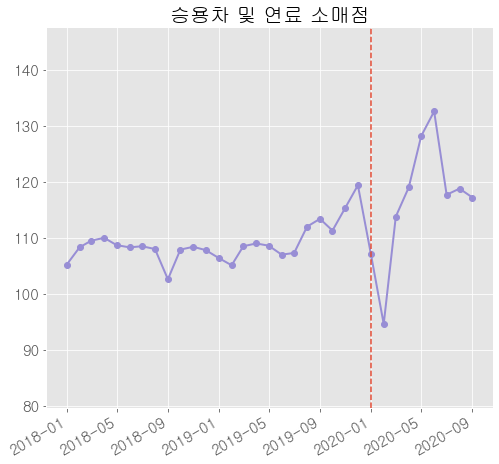

In [21]:
make_graph('승용차 및 연료 소매점')

승용차 및 연료 소매점(주유소 등)은 2월에 잠시 주춤하였으나 빠르게 회복하였습니다.

신형 자동차들의 출시, 코로나로 인한 대중교통 이용보다 자차를 선호하는 트렌드가 영향을 준 것으로 보입니다.

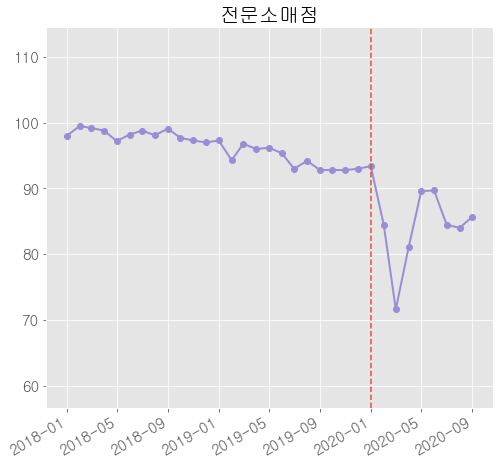

In [22]:
make_graph('전문소매점')

전문소매점(가전, 가구, 의류 등)의 경우 코로나 타격을 받았으나 어느정도 회복하였습니다.

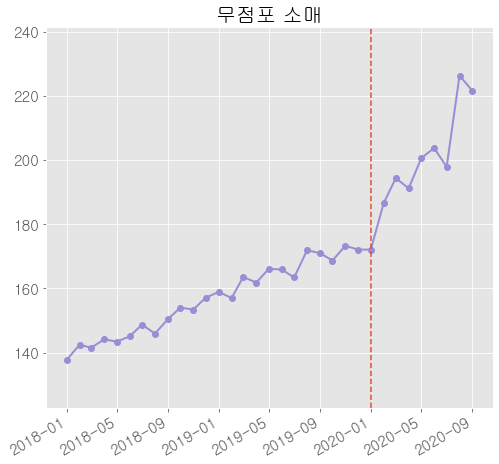

In [23]:
make_graph('무점포 소매')


가장 도드라지는 것은 무점포 소매(온라인 쇼핑몰 등) 입니다. 코로나 이전부터 꾸준히 상승세를 보였고 코로나 이후 오히려 더 높은 성장세를 보입니다.

무점포 소매의 성장에는 언택트 트렌드와 사회적 거리두기의 효과가 큰 것으로 보입니다.



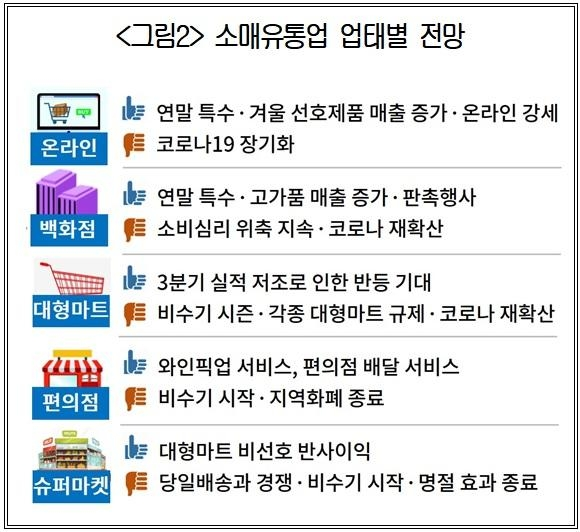
출처: 대한상공회의소